In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

## Understanding the Data 

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
893,ham,It's ok i noe u're busy but i'm really too bor...,NaN,NaN,NaN
76,ham,Thats cool. i am a gentleman and will treat yo...,NaN,NaN,NaN
2447,ham,Tmr then Ì_ brin lar... Aiya later i come n c ...,NaN,NaN,NaN
4448,spam,Urgent UR awarded a complimentary trip to Euro...,NaN,NaN,NaN
4646,ham,God created gap btwn ur fingers so dat sum1 vr...,NaN,NaN,NaN


In [7]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
df.shape

(5572, 5)

## Procedures

1) Data Cleaning

2) Data Analysis

3) Data Pre-Processing (vectorization, stemming etc)

4) Model building 

5) Evaluation 

6) Improvment ( if needed for maximum accracy)

7) Converting into a website

8) Deploying the website

## Data Cleaning

out of the 5 coloums we see that only the first two has a large amount of data. we will remove the other 3 coluumns.

In [9]:
df.drop(columns=['Unnamed: 2',	'Unnamed: 3', 'Unnamed: 4'], inplace =True)

In [10]:
df.sample(5)

,v1,v2
425,ham,Ok. She'll be ok. I guess
3321,ham,Ok darlin i supose it was ok i just worry too ...
2768,ham,I am on the way to ur home
2861,spam,Adult 18 Content Your video will be with you s...
3885,ham,"Same, I'm at my great aunts anniversary party ..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
#Renaming columns

df.rename(columns={'v1' : 'target', 'v2' : 'text'}, inplace = True)
df.sample(5)

,target,text
4749,ham,"If you're still up, maybe leave the credit car..."
2914,ham,Nothing lor... A bit bored too... Then y dun u...
2594,ham,"ThatÛ÷s the thing with apes, u can fight to t..."
4101,ham,Ok then i will come to ur home after half an hour
787,spam,Ever thought about living a good life with a p...


In [13]:
# Assigning the value 0 for ham and 1 for spam
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#Checking for missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#Check for duplicate values
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 403


In [17]:
# There seem to be 403 duplicate values so we are removing the duplicates
df = df.drop_duplicates(keep ='first')
# Now let's check the total number of duplicates.
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [18]:
df.shape

(5169, 2)

## Data Analysis

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1e2ae8f5db0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

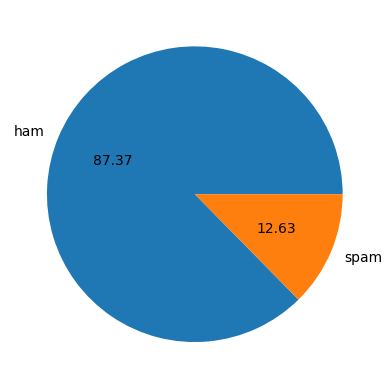

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

87% data is not spam only 12.63 is spam which means the data is imbalanced.

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ardra
[nltk_data]     Ajay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_charecters']= df['text'].apply(len) # length of very sms

In [25]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#Fetch the number of words
# We are breaking all the sms by words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

In [ ]:
df[['num_charecters' , 'num_words' , 'num_sentences']].describe()

##  Analysis of Ham

In [ ]:
df[df['target']== 0][['num_charecters' , 'num_words' , 'num_sentences']].describe()

## Analysis of Spam

In [ ]:
df[df['target']==1][['num_charecters', 'num_words' , 'num_sentences']].describe()

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_charecters'], color = 'green')
sns.histplot(df[df['target']==1]['num_charecters'], color='red')

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='red')

In [ ]:
# checking the relationship between the number of words and number of sentences
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='target')
# there are outliers in the data

## Looking for correlations

In [ ]:
corr_matrix = df[['target','num_charecters', 'num_words' , 'num_sentences']].corr()
print(corr_matrix)

In [ ]:
sns.heatmap(data=corr_matrix, annot=True)

here we see that num_charecters is giving most high correleation with target so we choosed num_charecters for model

## Data Preprocessing

 1) we convert the data (text) to lower case. (using text.lower() )

 2) we break the data into words (using nltk.word_tokenize)

 3) we remove all the special charecters (by creating a list and appending only words [ after breaking sentences into words using tokenize and numbers)

 4) we remove stop words ike is of which does not really add much meaning to the sentence. (from nltk.corpus import stopwords)

 5) we remove all the punctuations. (using string.punctuation

 6) we perform stemming, same type of words in diffrent tenses are converted to one eg: play, played, plays will get convert to play.

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()  # Converting the text to lowercase
    text = nltk.word_tokenize(text)  # Breaking the sentences into words

    y = []  # Create the list y outside the loop
    for i in text:
        if i.isalnum():  # Only taking alphabets and numbers
            y.append(i)  # Appending to y

    processed_text = ""  # Initialize an empty string
    for word in y:  # Iterate through the processed words
        if word not in stopwords.words('english') and word not in string.punctuation:
            processed_text += word + " "  # Concatenate words with spaces

    return processed_text.strip()  # Remove trailing space

In [ ]:
#stopwords.words('english') 
#(this is too long all the stop words diplayed so put it in comment for reference

In [ ]:
#See all the punctualios that come under string
string.punctuation

In [ ]:
ps.stem("Loving")

In [ ]:
transform_text(" I loved the way she was Talking. How about you?") 
# stemming will remove present continous and past to simple present tense.

In [ ]:
df['text'][10]

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)    #Creating a new coloumn called transformed text

In [ ]:
print(df['transformed_text'].dtype)

In [ ]:
df.head()

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].astype(str).str.cat(sep=" "))
# here we are chosing those rows that are spam and extracting the transformed text and taking the string in it and concatinating with space.

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].astype(str).str.cat(sep=" "))
plt.imshow(spam_wc)

In [ ]:
df.head()

In [ ]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg:  # Accessing each string directly
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(10))

In [ ]:
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

In [ ]:
dfcopy1 =df.copy()
dfcopy1 = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(data=dfcopy1, x='word', y='count')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg:  # Accessing each string directly
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

In [ ]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(10))

In [ ]:
dfcopy2 = df.copy()
dfcopy2 = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(data=dfcopy2, x='word', y='count')
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [ ]:
df.head()

Any machine learning algoritm needs a numerical input here as we can see that our input is transformed text and output is target.
we need to convert our input that is transformed text to numbers for that we we have to vectorize transformed text
there are a few methods with which we can convert text to numbers that is perform vectorization

1) Bag of words model : we make a new column of frequent words and we will compare with each text data on how many time the frequent words appear.
the number of times it appears ( that is the frequency) are the numbers that becomes the vectors.

2) Term Frequency - Inverse Document Frequency (TF-IDF) model : tells us how often each word appears, giving you its Term Frequency (TF).
Give more weight to rarer words.  Words like "the" or "and" appear often but aren't very informative. TF-IDF lowers the value of common words by calculating their Inverse Document Frequency (IDF). Multiply TF and IDF.  This gives us the final TF-IDF score for each word in each document.
then turn text into a list of numbers.

3) Word2vec model: It creates a word dictionary, assigning each word a unique number (like a secret code).It tries to predict nearby words based on the current word. It adjusts word numbers as it learns, so that words that often appear together have similar numbers

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
 X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

In [ ]:
Y = df[['target']].values

In [ ]:
Y.shape

## Train - Test Splitting

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Set random_state for reproducibility
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

## Selecting The Desired Model

Naive Bayes is one of the most popular text classification algorithms which gives very good results.

1. Gaussian Naive Bayes:

Assumes features follow a Gaussian (normal) distribution.
Suitable for continuous features like height, weight, or temperature.
Not ideal for categorical features like hair color or occupation.

2. Multinomial Naive Bayes:

Assumes features follow a multinomial distribution.
Useful for count data, like word occurrences in a document or frequency of different values in a categorical feature.
Not ideal for continuous features or features with large variances.

3. Bernoulli Naive Bayes:

Assumes features are binary (present or not present).
Applicable to features like "has email address" or "likes chocolate."
Not appropriate for features with multiple values or continuous data.ntinuous data.

In [ ]:
from sklearn.naive_bayes import  GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

accuracy_score: To measure overall model accuracy, gives a general sense of how accurate the model is overall.
confusion_matrix: To create a table showing correct and incorrect predictions in detai, offers a deeper look into where the model makes mistakes..
precision_score: To measure the model's accuracy in identifying positive cas, focuses on how well the model identifies specific cases like spam.s.

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

## Gaussian Naive Bayes Model

In [ ]:
gnb.fit(X_train,Y_train)
Y_pred1= gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

Gaussian Naive Bayes Model with  Count Vectorizer, a text preprocessing technique is giving bad results

--> Accuracy Score = 0.8780251694094869 
--> Precision Score = 0.5086206896551724

Gaussian Naive Bayes Model with TF-IDF , a text preprocessing technique is giving bad results

--> Accuracy Score = 0.8770571151984511
--> Precision Score = 0.5065502183406113

## Multinomial Naive Bayes Model

In [ ]:
mnb.fit(X_train,Y_train)
Y_pred2= mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

Multinomial Naive Bayes Model with  Count Vectorizer, a text preprocessing technique is giving pretty good results

--> Accuracy Score = 0.9757986447241046
--> Precision Score = 0.8776978417266187

Note: The data is imbalanced so we need to that we get the best precision score it's fine it the accuracy score is not best just good enough.

Multinomial Naive Bayes Model with TF-IDF , a text preprocessing technique is giving very good accuracy score and perfect precision score.

--> Accuracy Score = 0.957405614714424
--> Precision Score = 1.0

Note : Precision Score is 1 which means not a single false positive

## Bernoulli Naive Bayes Model

In [ ]:
bnb.fit(X_train,Y_train)
Y_pred3= bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

 Bernoulli Naive Bayes Model with  Count Vectorizer, a text preprocessing technique is giving pretty good results
 
--> Accuracy Score = 0.9699903194578896
--> Precision Score = 0.9714285714285714

 Bernoulli Naive Bayes Model with TF-IDF , a text preprocessing technique results
 
--> Accuracy Score = 0.9699903194578896
--> Precision Score = 0.9714285714285714

Both Multinomial Naive Bayes (MNB) and Bernoulli Naive Bayes (BNB) models with TF-IDF exhibit high accuracy and precision scores. 
The perfect precision score of 1.0 in MNB raises a slight concern for potential overfitting.
So the BNB model marginally outperforms MNB in terms of both accuracy and precision.

## Trying out more models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')  # Using L1 penalty
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
'Support Vector Classifier': svc,
'Bernoulli Naive Bayes Model':bnb,
'KNeighborsClassifier': knc,
'Decision Tree Classifier': dtc,
'Logistic Regression': lrc,
'Random Forest Classifier': rfc,
'Ada Boost Classifier': abc,
'Bagging Classifier': bc,
'Extra Trees Classifier': etc,
'Gradient Boosting Classifier':gbdt,
'XGBClassifier':xgb
}

In [ ]:
def train_classifier(clf, X_train,Y_train, X_test,Y_test): 
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred) 
    precision = precision_score(Y_test,Y_pred)
    return accuracy, precision

In [ ]:
train_classifier(etc,X_train,Y_train,X_test,Y_test)

In [ ]:
import numpy as np
accuracy_scores = []
precision_scores = []

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

accuracy_scores = np.empty(len(clfs))
precision_scores = np.empty(len(clfs))

In [ ]:
for i, (name, clf) in enumerate(clfs.items()):
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)
    accuracy_scores[i] = current_accuracy
    precision_scores[i] = current_precision

In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(etc, open('model.pkl', 'wb'))